<a href="https://colab.research.google.com/github/Sinchana-nm/unified-based-genetic-algorithm-ubga-/blob/main/UBGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from deap import base, creator, tools, algorithms
import random

# Load dataset
data = pd.read_csv("Subset_final2.csv")

# Extract necessary fields
cpu_cores = data["CPU cores"]
cpu_capacity = data["CPU capacity provisioned [MHZ]"]
cpu_usage_mhz = data["CPU usage [MHZ]"]
cpu_usage_percent = data["CPU usage [%]"]
memory_capacity = data["Memory capacity provisioned [KB]"]
memory_usage = data["Memory usage [KB]"]
memory_usage_percent = data["Memory usage [%]"]

# Define GA problem
creator.create("FitnessMax", base.Fitness, weights=(1.0, -1.0))  # Maximize scheduling, minimize energy usage
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_task", random.randint, 0, len(data) - 1)  # Randomly select a task index from data
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_task, len(data) // 10)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Fitness function to evaluate resource allocation and scheduling
def fitness(individual):
    total_cpu_usage = sum(cpu_usage_mhz[i] for i in individual)
    total_memory_usage = sum(memory_usage[i] for i in individual)

    cpu_efficiency = sum(cpu_usage_percent[i] for i in individual) / len(individual)
    memory_efficiency = sum(memory_usage_percent[i] for i in individual) / len(individual)

    # Normalize energy consumption and scheduling efficiency
    energy_usage = total_cpu_usage + total_memory_usage
    scheduling_efficiency = (cpu_efficiency + memory_efficiency) / 2

    # Maximize scheduling efficiency while minimizing energy usage
    return scheduling_efficiency, -energy_usage

toolbox.register("evaluate", fitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Run genetic algorithm
def run_ga():
    population = toolbox.population(n=50)
    NGEN = 40  # Number of generations
    CXPB, MUTPB = 0.5, 0.2  # Crossover and mutation probabilities

    for gen in range(NGEN):
        # Select and clone the next generation of individuals
        offspring = toolbox.select(population, len(population))
        offspring = list(map(toolbox.clone, offspring))

        # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # Replace population with the offspring
        population[:] = offspring

    # Get the best solution
    best_individual = tools.selBest(population, 1)[0]
    return best_individual, best_individual.fitness.values

best_solution, best_fitness = run_ga()
print("Best Solution:", best_solution)
print("Best Fitness:", best_fitness)


Best Solution: [1010, 186, 1928, 1, 1118, 1359, 0, 282, 0, 902, 1722, 1, 0, 636, 1, 1, 1, 777, 0, 0, 134, 503, 1219, 74, 0, 95, 1065, 1912, 0, 0, 142, 1182, 618, 277, 1961, 1525, 1772, 0, 0, 0, 1, 957, 1032, 621, 261, 143, 1427, 68, 1676, 0, 0, 1228, 107, 0, 0, 378, 1, 382, 0, 1103, 1377, 403, 0, 0, 1807, 0, 805, 1605, 1558, 578, 225, 415, 1, 1, 0, 719, 1268, 1624, 215, 0, 1638, 0, 0, 1860, 397, 1405, 134, 1, 647, 0, 830, 0, 1623, 0, 1859, 1791, 0, 1, 475, 0, 0, 1, 0, 1077, 0, 1824, 1077, 0, 0, 0, 0, 207, 102, 0, 0, 1593, 549, 866, 786, 0, 473, 1404, 540, 1566, 1, 0, 410, 603, 738, 0, 0, 1, 250, 0, 1514, 537, 0, 0, 0, 0, 434, 274, 1278, 398, 658, 0, 0, 433, 134, 1, 1773, 1941, 1681, 1, 1714, 0, 1686, 267, 1915, 1419, 1614, 1022, 0, 825, 1459, 1822, 1, 0, 4, 272, 0, 683, 0, 0, 1338, 714, 1, 705, 243, 1, 815, 0, 291, 0, 397, 0, 834, 1770, 0, 0, 0, 1877, 1914, 1986, 535, 0, 0, 0, 0, 210]
Best Fitness: (15.184300000000016, -217827960.0)


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


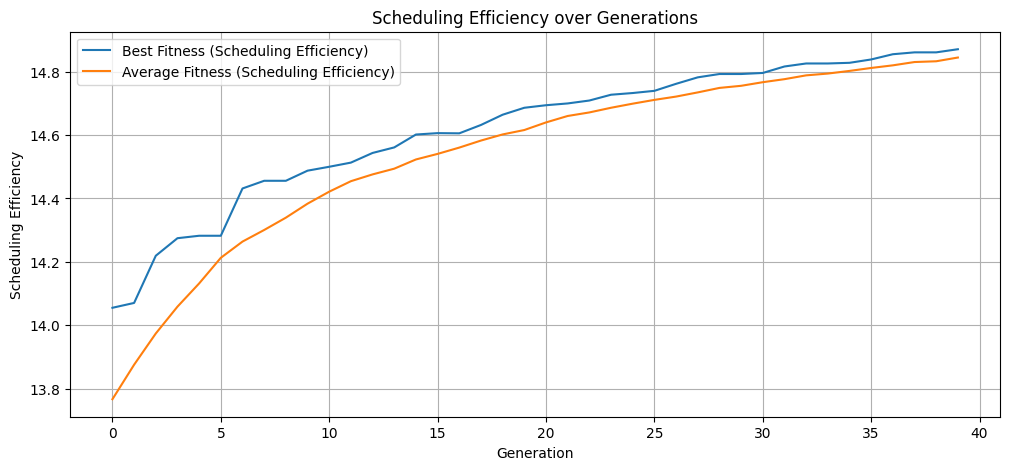

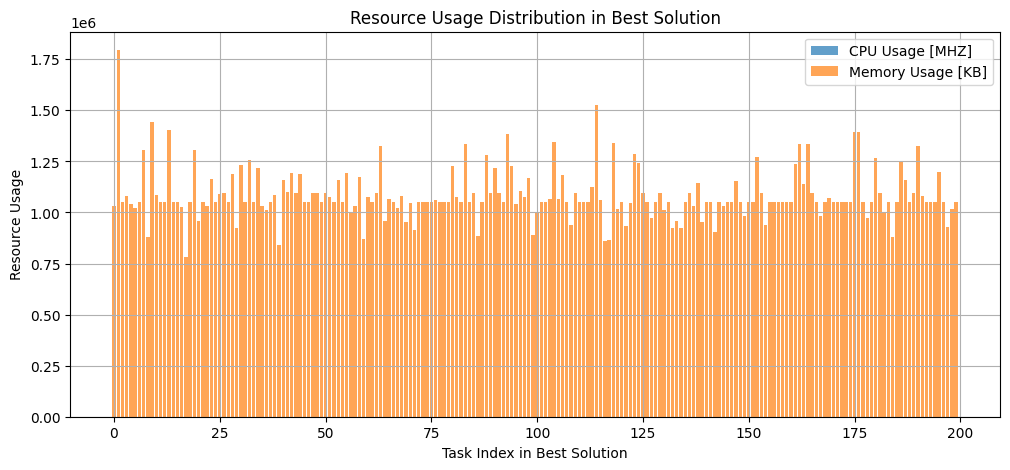

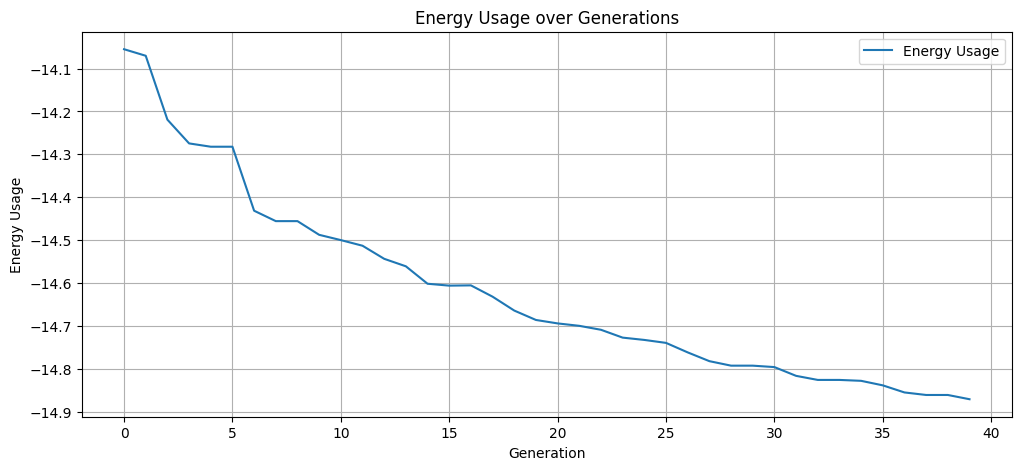

In [ ]:
#Above code along with the necessary plots
import pandas as pd
import numpy as np
import random
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("Subset_final2.csv")

# Extract necessary fields
cpu_cores = data["CPU cores"]
cpu_capacity = data["CPU capacity provisioned [MHZ]"]
cpu_usage_mhz = data["CPU usage [MHZ]"]
cpu_usage_percent = data["CPU usage [%]"]
memory_capacity = data["Memory capacity provisioned [KB]"]
memory_usage = data["Memory usage [KB]"]
memory_usage_percent = data["Memory usage [%]"]

# Define GA problem
creator.create("FitnessMax", base.Fitness, weights=(1.0, -1.0))  # Maximize scheduling, minimize energy usage
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_task", random.randint, 0, len(data) - 1)  # Randomly select a task index from data
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_task, len(data) // 10)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Fitness function to evaluate resource allocation and scheduling
def fitness(individual):
    total_cpu_usage = sum(cpu_usage_mhz[i] for i in individual)
    total_memory_usage = sum(memory_usage[i] for i in individual)

    cpu_efficiency = sum(cpu_usage_percent[i] for i in individual) / len(individual)
    memory_efficiency = sum(memory_usage_percent[i] for i in individual) / len(individual)

    # Normalize energy consumption and scheduling efficiency
    energy_usage = total_cpu_usage + total_memory_usage
    scheduling_efficiency = (cpu_efficiency + memory_efficiency) / 2

    # Maximize scheduling efficiency while minimizing energy usage
    return scheduling_efficiency, -energy_usage

toolbox.register("evaluate", fitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Run genetic algorithm and store stats
def run_ga():
    population = toolbox.population(n=50)
    NGEN = 40  # Number of generations
    CXPB, MUTPB = 0.5, 0.2  # Crossover and mutation probabilities

    # Track best fitness values over generations
    best_fitness_values = []
    avg_fitness_values = []

    for gen in range(NGEN):
        # Select and clone the next generation of individuals
        offspring = toolbox.select(population, len(population))
        offspring = list(map(toolbox.clone, offspring))

        # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # Replace population with the offspring
        population[:] = offspring

        # Track best and average fitness in current generation
        fits = [ind.fitness.values[0] for ind in population]
        best_fitness_values.append(max(fits))
        avg_fitness_values.append(np.mean(fits))

    # Get the best solution at the end
    best_individual = tools.selBest(population, 1)[0]
    return best_individual, best_individual.fitness.values, best_fitness_values, avg_fitness_values

best_solution, best_fitness, best_fitness_values, avg_fitness_values = run_ga()

# Plotting results
# 1. Plot scheduling efficiency over generations
plt.figure(figsize=(12, 5))
plt.plot(best_fitness_values, label='Best Fitness (Scheduling Efficiency)')
plt.plot(avg_fitness_values, label='Average Fitness (Scheduling Efficiency)')
plt.xlabel('Generation')
plt.ylabel('Scheduling Efficiency')
plt.title('Scheduling Efficiency over Generations')
plt.legend()
plt.grid(True)
plt.show()

# 2. Plot CPU and memory usage distribution in the best solution
cpu_usage_in_best_solution = [cpu_usage_mhz[i] for i in best_solution]
memory_usage_in_best_solution = [memory_usage[i] for i in best_solution]

plt.figure(figsize=(12, 5))
indices = range(len(best_solution))
plt.bar(indices, cpu_usage_in_best_solution, alpha=0.7, label='CPU Usage [MHZ]')
plt.bar(indices, memory_usage_in_best_solution, alpha=0.7, label='Memory Usage [KB]', bottom=cpu_usage_in_best_solution)
plt.xlabel('Task Index in Best Solution')
plt.ylabel('Resource Usage')
plt.title('Resource Usage Distribution in Best Solution')
plt.legend()
plt.grid(True)
plt.show()

# 3. Plot energy usage over generations (optional if you have energy data per generation)
energy_usage_values = [-val for val in best_fitness_values]  # Since energy is minimized, negative values
plt.figure(figsize=(12, 5))
plt.plot(energy_usage_values, label='Energy Usage')
plt.xlabel('Generation')
plt.ylabel('Energy Usage')
plt.title('Energy Usage over Generations')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


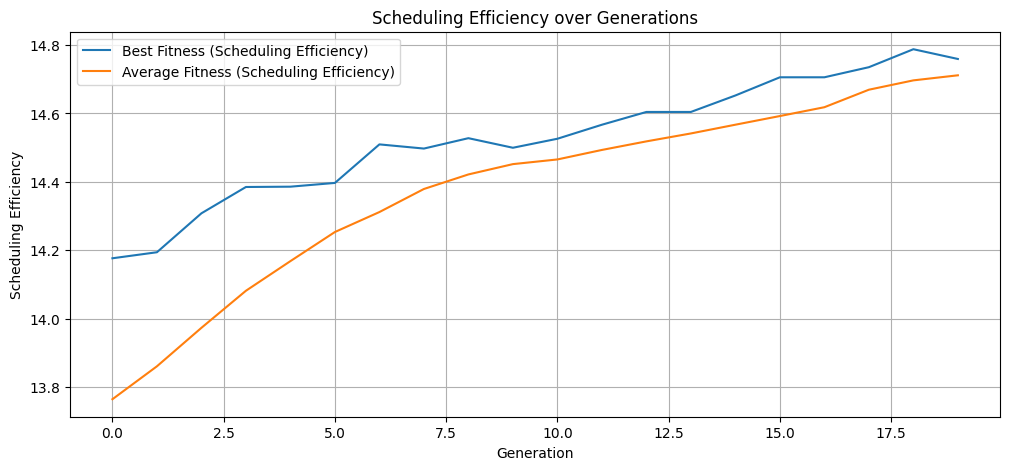

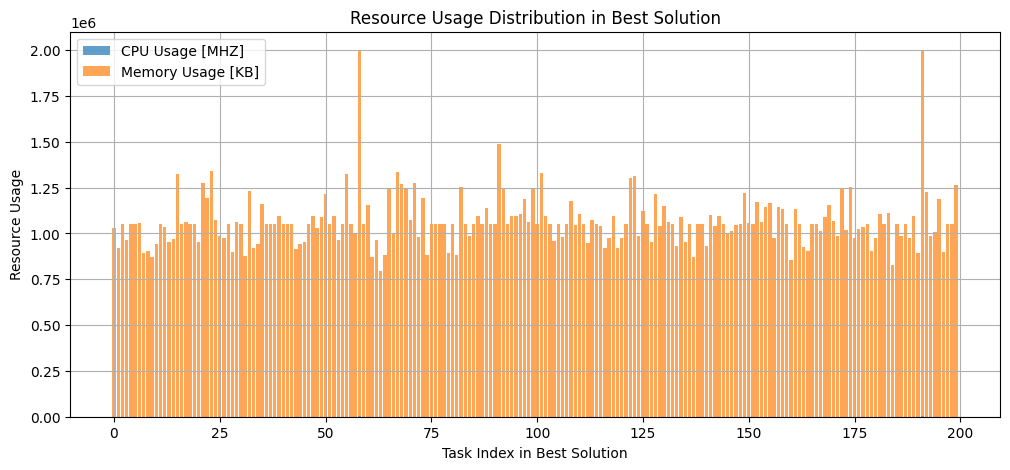

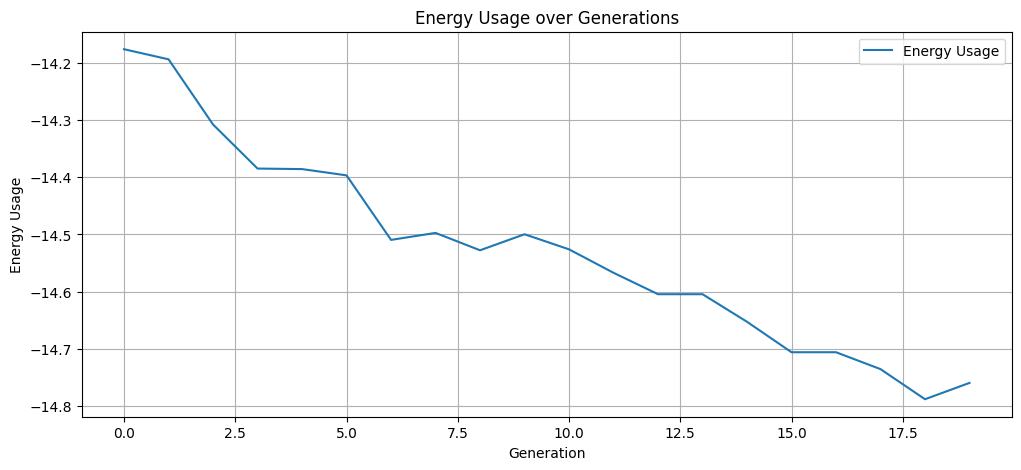

In [ ]:
#Changing number of generations to 20
import pandas as pd
import numpy as np
import random
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("/content/Subset_final2.csv")

# Extract necessary fields
cpu_cores = data["CPU cores"]
cpu_capacity = data["CPU capacity provisioned [MHZ]"]
cpu_usage_mhz = data["CPU usage [MHZ]"]
cpu_usage_percent = data["CPU usage [%]"]
memory_capacity = data["Memory capacity provisioned [KB]"]
memory_usage = data["Memory usage [KB]"]
memory_usage_percent = data["Memory usage [%]"]

# Define GA problem
creator.create("FitnessMax", base.Fitness, weights=(1.0, -1.0))  # Maximize scheduling, minimize energy usage
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_task", random.randint, 0, len(data) - 1)  # Randomly select a task index from data
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_task, len(data) // 10)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Fitness function to evaluate resource allocation and scheduling
def fitness(individual):
    total_cpu_usage = sum(cpu_usage_mhz[i] for i in individual)
    total_memory_usage = sum(memory_usage[i] for i in individual)

    cpu_efficiency = sum(cpu_usage_percent[i] for i in individual) / len(individual)
    memory_efficiency = sum(memory_usage_percent[i] for i in individual) / len(individual)

    # Normalize energy consumption and scheduling efficiency
    energy_usage = total_cpu_usage + total_memory_usage
    scheduling_efficiency = (cpu_efficiency + memory_efficiency) / 2

    # Maximize scheduling efficiency while minimizing energy usage
    return scheduling_efficiency, -energy_usage

toolbox.register("evaluate", fitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Run genetic algorithm and store stats
def run_ga():
    population = toolbox.population(n=50)
    NGEN = 20  # Number of generations
    CXPB, MUTPB = 0.5, 0.2  # Crossover and mutation probabilities

    # Track best fitness values over generations
    best_fitness_values = []
    avg_fitness_values = []

    for gen in range(NGEN):
        # Select and clone the next generation of individuals
        offspring = toolbox.select(population, len(population))
        offspring = list(map(toolbox.clone, offspring))

        # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # Replace population with the offspring
        population[:] = offspring

        # Track best and average fitness in current generation
        fits = [ind.fitness.values[0] for ind in population]
        best_fitness_values.append(max(fits))
        avg_fitness_values.append(np.mean(fits))

    # Get the best solution at the end
    best_individual = tools.selBest(population, 1)[0]
    return best_individual, best_individual.fitness.values, best_fitness_values, avg_fitness_values

best_solution, best_fitness, best_fitness_values, avg_fitness_values = run_ga()

# Plotting results
# 1. Plot scheduling efficiency over generations
plt.figure(figsize=(12, 5))
plt.plot(best_fitness_values, label='Best Fitness (Scheduling Efficiency)')
plt.plot(avg_fitness_values, label='Average Fitness (Scheduling Efficiency)')
plt.xlabel('Generation')
plt.ylabel('Scheduling Efficiency')
plt.title('Scheduling Efficiency over Generations')
plt.legend()
plt.grid(True)
plt.show()

# 2. Plot CPU and memory usage distribution in the best solution
cpu_usage_in_best_solution = [cpu_usage_mhz[i] for i in best_solution]
memory_usage_in_best_solution = [memory_usage[i] for i in best_solution]

plt.figure(figsize=(12, 5))
indices = range(len(best_solution))
plt.bar(indices, cpu_usage_in_best_solution, alpha=0.7, label='CPU Usage [MHZ]')
plt.bar(indices, memory_usage_in_best_solution, alpha=0.7, label='Memory Usage [KB]', bottom=cpu_usage_in_best_solution)
plt.xlabel('Task Index in Best Solution')
plt.ylabel('Resource Usage')
plt.title('Resource Usage Distribution in Best Solution')
plt.legend()
plt.grid(True)
plt.show()

# 3. Plot energy usage over generations (optional if you have energy data per generation)
energy_usage_values = [-val for val in best_fitness_values]  # Since energy is minimized, negative values
plt.figure(figsize=(12, 5))
plt.plot(energy_usage_values, label='Energy Usage')
plt.xlabel('Generation')
plt.ylabel('Energy Usage')
plt.title('Energy Usage over Generations')
plt.legend()
plt.grid(True)
plt.show()


Generation 1:
Best Scheduling Efficiency: 14.314250
Average Scheduling Efficiency: 13.810092
Average Energy Usage: -13.810092
--------------------------------------------------
Generation 2:
Best Scheduling Efficiency: 14.385450
Average Scheduling Efficiency: 13.941437
Average Energy Usage: -13.941437
--------------------------------------------------
Generation 3:
Best Scheduling Efficiency: 14.385450
Average Scheduling Efficiency: 14.072432
Average Energy Usage: -14.072432
--------------------------------------------------
Generation 4:
Best Scheduling Efficiency: 14.425475
Average Scheduling Efficiency: 14.245130
Average Energy Usage: -14.245130
--------------------------------------------------
Generation 5:
Best Scheduling Efficiency: 14.426000
Average Scheduling Efficiency: 14.332322
Average Energy Usage: -14.332322
--------------------------------------------------
Generation 6:
Best Scheduling Efficiency: 14.459350
Average Scheduling Efficiency: 14.378995
Average Energy Usage: 

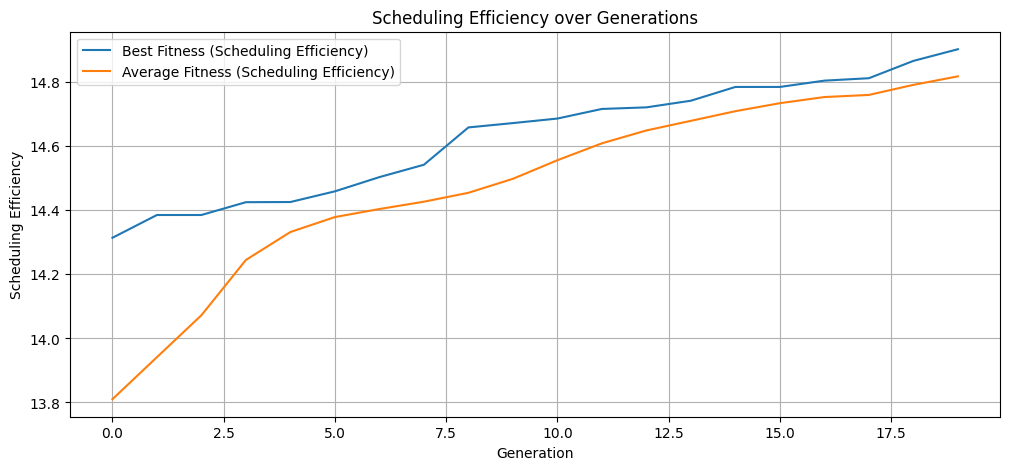

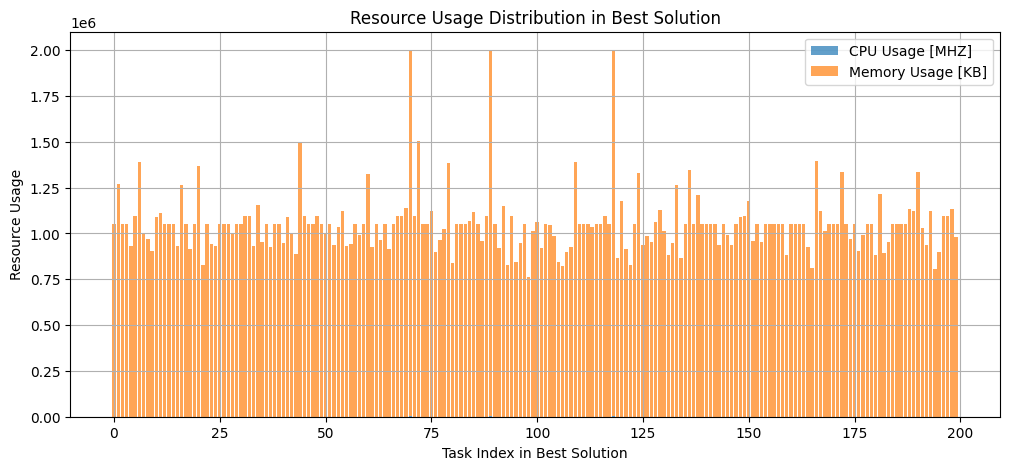

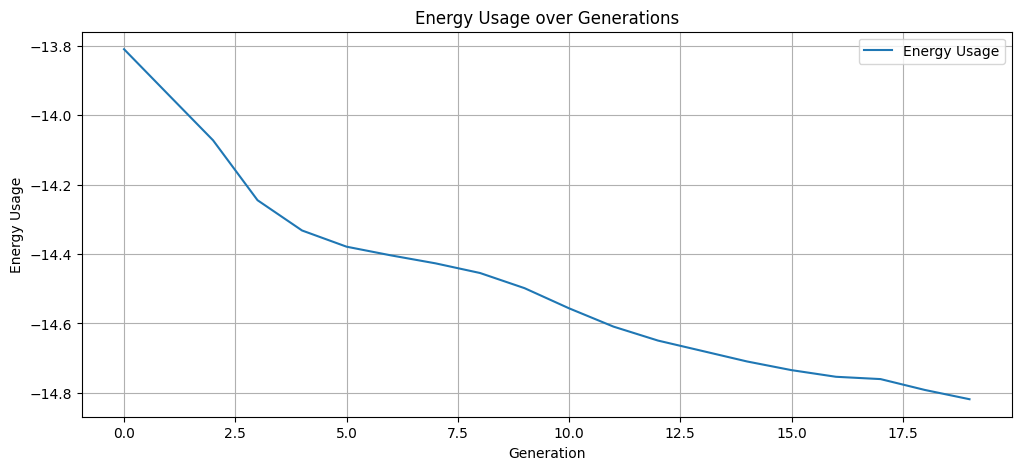

In [ ]:
import pandas as pd
import numpy as np
import random
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("/content/Subset_final2.csv")

# Extract necessary fields
cpu_cores = data["CPU cores"]
cpu_capacity = data["CPU capacity provisioned [MHZ]"]
cpu_usage_mhz = data["CPU usage [MHZ]"]
cpu_usage_percent = data["CPU usage [%]"]
memory_capacity = data["Memory capacity provisioned [KB]"]
memory_usage = data["Memory usage [KB]"]
memory_usage_percent = data["Memory usage [%]"]

# Define GA problem
creator.create("FitnessMax", base.Fitness, weights=(1.0, -1.0))  # Maximize scheduling, minimize energy usage
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_task", random.randint, 0, len(data) - 1)  # Randomly select a task index from data
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_task, len(data) // 10)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Fitness function to evaluate resource allocation and scheduling
def fitness(individual):
    total_cpu_usage = sum(cpu_usage_mhz[i] for i in individual)
    total_memory_usage = sum(memory_usage[i] for i in individual)

    cpu_efficiency = sum(cpu_usage_percent[i] for i in individual) / len(individual)
    memory_efficiency = sum(memory_usage_percent[i] for i in individual) / len(individual)

    # Normalize energy consumption and scheduling efficiency
    energy_usage = total_cpu_usage + total_memory_usage
    scheduling_efficiency = (cpu_efficiency + memory_efficiency) / 2

    # Maximize scheduling efficiency while minimizing energy usage
    return scheduling_efficiency, -energy_usage

toolbox.register("evaluate", fitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Run genetic algorithm and store stats
def run_ga():
    population = toolbox.population(n=50)
    NGEN = 20  # Number of generations
    CXPB, MUTPB = 0.5, 0.2  # Crossover and mutation probabilities

    # Track best fitness values over generations
    best_fitness_values = []
    avg_fitness_values = []
    energy_usage_values = []

    for gen in range(NGEN):
        # Select and clone the next generation of individuals
        offspring = toolbox.select(population, len(population))
        offspring = list(map(toolbox.clone, offspring))

        # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # Replace population with the offspring
        population[:] = offspring

        # Track best and average fitness in current generation
        fits = [ind.fitness.values[0] for ind in population]
        best_fitness_values.append(max(fits))
        avg_fitness_values.append(np.mean(fits))

        # Calculate energy usage for the current generation
        energy_usage_values.append(-np.mean(fits))  # Since energy is minimized, we use negative fitness for energy

        # Print numerical output for the current generation
        print(f"Generation {gen + 1}:")
        print(f"Best Scheduling Efficiency: {max(fits):.6f}")
        print(f"Average Scheduling Efficiency: {np.mean(fits):.6f}")
        print(f"Average Energy Usage: {energy_usage_values[-1]:.6f}")
        print("-" * 50)

    # Get the best solution at the end
    best_individual = tools.selBest(population, 1)[0]
    return best_individual, best_individual.fitness.values, best_fitness_values, avg_fitness_values, energy_usage_values

best_solution, best_fitness, best_fitness_values, avg_fitness_values, energy_usage_values = run_ga()

# Plotting results
# 1. Plot scheduling efficiency over generations
plt.figure(figsize=(12, 5))
plt.plot(best_fitness_values, label='Best Fitness (Scheduling Efficiency)')
plt.plot(avg_fitness_values, label='Average Fitness (Scheduling Efficiency)')
plt.xlabel('Generation')
plt.ylabel('Scheduling Efficiency')
plt.title('Scheduling Efficiency over Generations')
plt.legend()
plt.grid(True)
plt.show()

# 2. Plot CPU and memory usage distribution in the best solution
cpu_usage_in_best_solution = [cpu_usage_mhz[i] for i in best_solution]
memory_usage_in_best_solution = [memory_usage[i] for i in best_solution]

plt.figure(figsize=(12, 5))
indices = range(len(best_solution))
plt.bar(indices, cpu_usage_in_best_solution, alpha=0.7, label='CPU Usage [MHZ]')
plt.bar(indices, memory_usage_in_best_solution, alpha=0.7, label='Memory Usage [KB]', bottom=cpu_usage_in_best_solution)
plt.xlabel('Task Index in Best Solution')
plt.ylabel('Resource Usage')
plt.title('Resource Usage Distribution in Best Solution')
plt.legend()
plt.grid(True)
plt.show()

# 3. Plot energy usage over generations
plt.figure(figsize=(12, 5))
plt.plot(energy_usage_values, label='Energy Usage')
plt.xlabel('Generation')
plt.ylabel('Energy Usage')
plt.title('Energy Usage over Generations')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


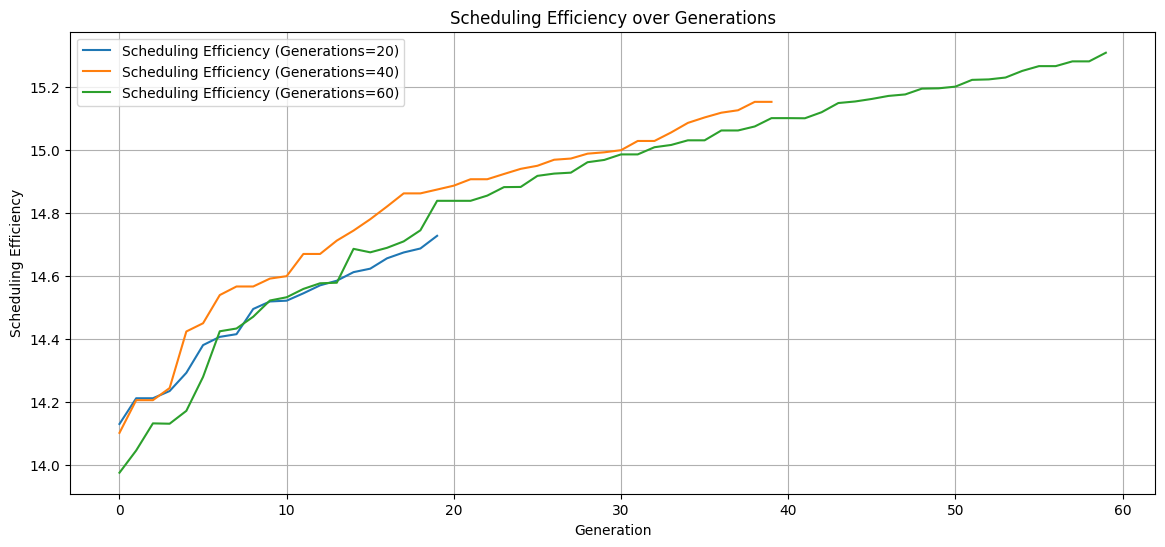

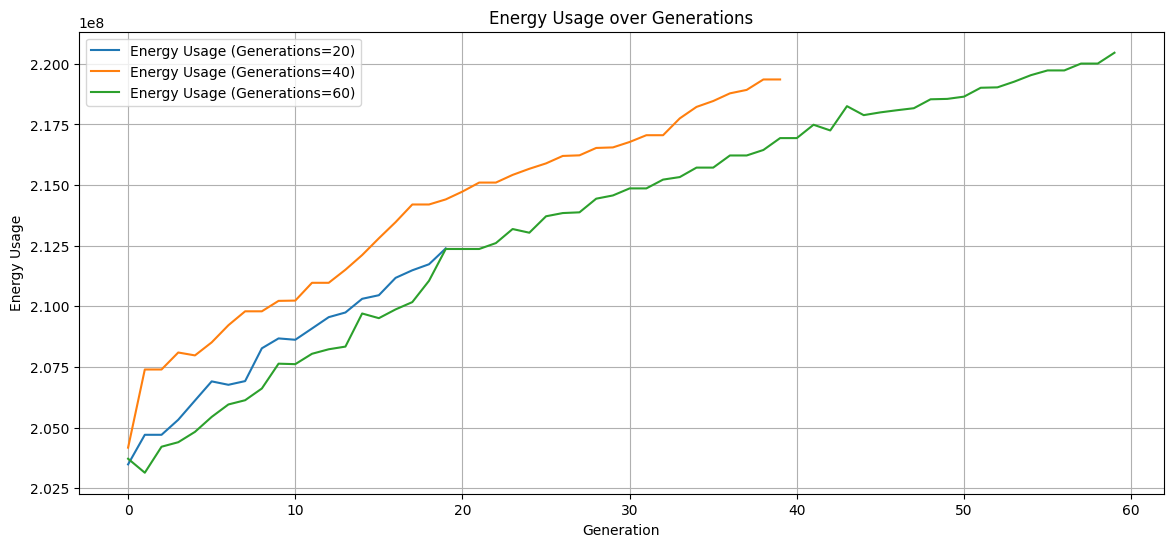

In [ ]:
#Varying and comparing results with different values for number of generations
import pandas as pd
import numpy as np
import random
from deap import base, creator, tools
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("/content/Subset_final2.csv")

# Extract necessary fields
cpu_cores = data["CPU cores"]
cpu_capacity = data["CPU capacity provisioned [MHZ]"]
cpu_usage_mhz = data["CPU usage [MHZ]"]
cpu_usage_percent = data["CPU usage [%]"]
memory_capacity = data["Memory capacity provisioned [KB]"]
memory_usage = data["Memory usage [KB]"]
memory_usage_percent = data["Memory usage [%]"]

# Define GA problem
creator.create("FitnessMax", base.Fitness, weights=(1.0, -1.0))  # Maximize scheduling, minimize energy usage
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_task", random.randint, 0, len(data) - 1)  # Randomly select a task index from data
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_task, len(data) // 10)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Fitness function to evaluate resource allocation and scheduling
def fitness(individual):
    total_cpu_usage = sum(cpu_usage_mhz[i] for i in individual)
    total_memory_usage = sum(memory_usage[i] for i in individual)

    cpu_efficiency = sum(cpu_usage_percent[i] for i in individual) / len(individual)
    memory_efficiency = sum(memory_usage_percent[i] for i in individual) / len(individual)

    # Normalize energy consumption and scheduling efficiency
    energy_usage = total_cpu_usage + total_memory_usage
    scheduling_efficiency = (cpu_efficiency + memory_efficiency) / 2

    # Maximize scheduling efficiency while minimizing energy usage
    return scheduling_efficiency, -energy_usage

toolbox.register("evaluate", fitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Function to run GA and collect data for plotting
def run_ga(num_generations):
    population = toolbox.population(n=50)
    CXPB, MUTPB = 0.5, 0.2  # Crossover and mutation probabilities

    best_fitness_values = []
    energy_usage_values = []

    for gen in range(num_generations):
        offspring = toolbox.select(population, len(population))
        offspring = list(map(toolbox.clone, offspring))

        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        population[:] = offspring

        # Collect best fitness and energy usage for plotting
        fits = [ind.fitness.values[0] for ind in population]
        best_ind = tools.selBest(population, 1)[0]
        best_fitness_values.append(max(fits))
        energy_usage_values.append(-best_ind.fitness.values[1])  # Convert to positive for plotting

    return best_fitness_values, energy_usage_values

# Run GA for 20, 40, and 60 generations and store results
gen_values = [20, 40, 60]
results = {gen: run_ga(gen) for gen in gen_values}

# Plot task scheduling efficiency and energy usage over generations for different values
plt.figure(figsize=(14, 6))

# Plot scheduling efficiency
for gen in gen_values:
    plt.plot(results[gen][0], label=f'Scheduling Efficiency (Generations={gen})')
plt.xlabel('Generation')
plt.ylabel('Scheduling Efficiency')
plt.title('Scheduling Efficiency over Generations')
plt.legend()
plt.grid(True)
plt.show()

# Plot energy usage
plt.figure(figsize=(14, 6))
for gen in gen_values:
    plt.plot(results[gen][1], label=f'Energy Usage (Generations={gen})')
plt.xlabel('Generation')
plt.ylabel('Energy Usage')
plt.title('Energy Usage over Generations')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


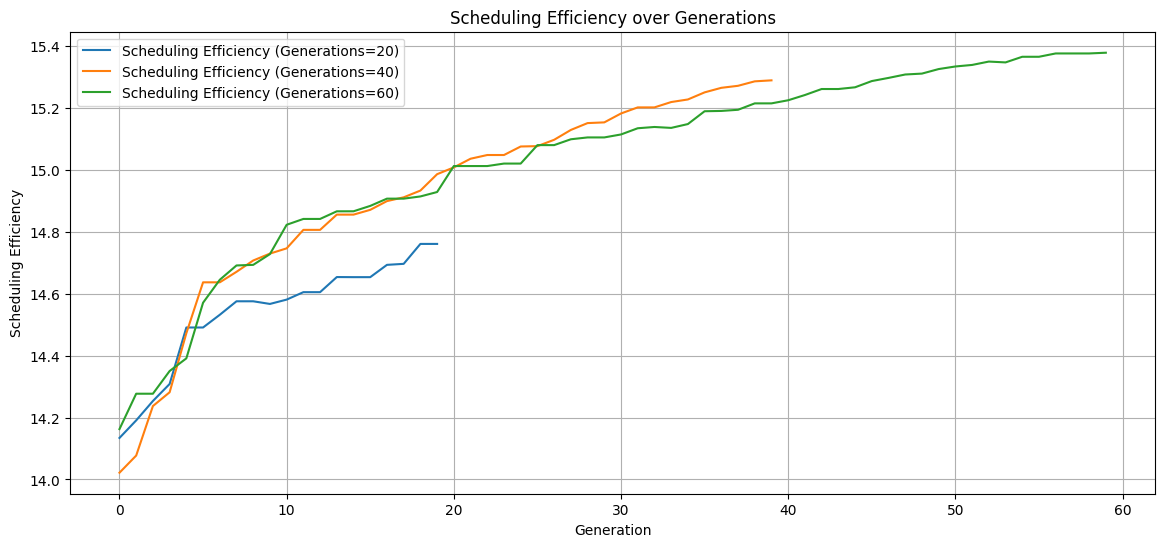

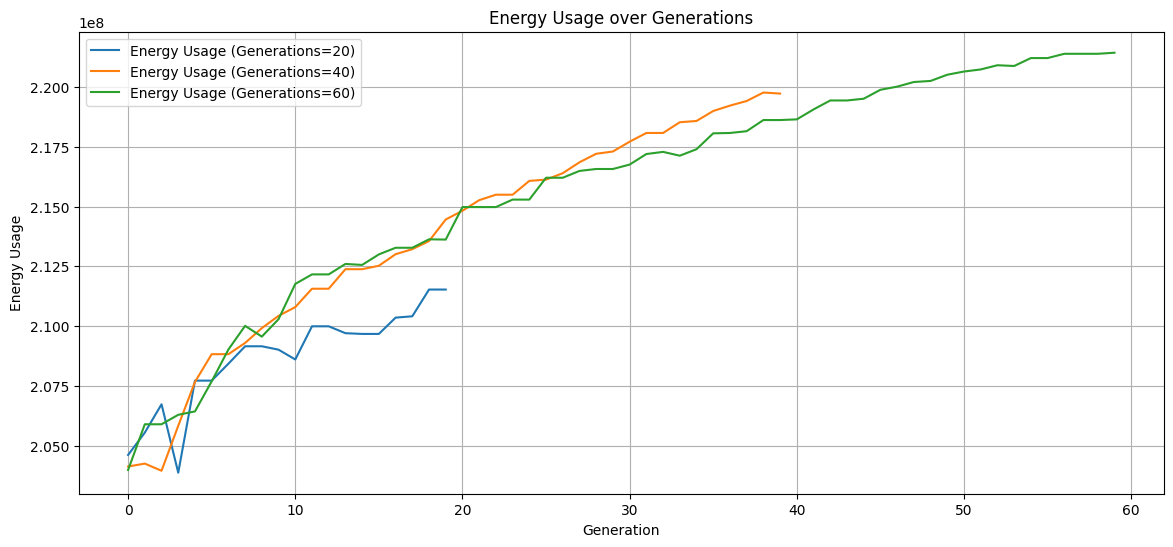

Final Results (Tabular Representation):
   Generations  Final Scheduling Efficiency  Final Energy Usage
0           20                    14.761400         211530176.0
1           40                    15.290125         219728679.0
2           60                    15.379425         221437207.0


In [ ]:
import pandas as pd
import numpy as np
import random
from deap import base, creator, tools
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("/content/Subset_final2.csv")

# Extract necessary fields
cpu_cores = data["CPU cores"]
cpu_capacity = data["CPU capacity provisioned [MHZ]"]
cpu_usage_mhz = data["CPU usage [MHZ]"]
cpu_usage_percent = data["CPU usage [%]"]
memory_capacity = data["Memory capacity provisioned [KB]"]
memory_usage = data["Memory usage [KB]"]
memory_usage_percent = data["Memory usage [%]"]

# Define GA problem
creator.create("FitnessMax", base.Fitness, weights=(1.0, -1.0))  # Maximize scheduling, minimize energy usage
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_task", random.randint, 0, len(data) - 1)  # Randomly select a task index from data
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_task, len(data) // 10)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Fitness function to evaluate resource allocation and scheduling
def fitness(individual):
    total_cpu_usage = sum(cpu_usage_mhz[i] for i in individual)
    total_memory_usage = sum(memory_usage[i] for i in individual)

    cpu_efficiency = sum(cpu_usage_percent[i] for i in individual) / len(individual)
    memory_efficiency = sum(memory_usage_percent[i] for i in individual) / len(individual)

    # Normalize energy consumption and scheduling efficiency
    energy_usage = total_cpu_usage + total_memory_usage
    scheduling_efficiency = (cpu_efficiency + memory_efficiency) / 2

    # Maximize scheduling efficiency while minimizing energy usage
    return scheduling_efficiency, -energy_usage

toolbox.register("evaluate", fitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Function to run GA and collect data for plotting
def run_ga(num_generations):
    population = toolbox.population(n=50)
    CXPB, MUTPB = 0.5, 0.2  # Crossover and mutation probabilities

    best_fitness_values = []
    energy_usage_values = []

    for gen in range(num_generations):
        offspring = toolbox.select(population, len(population))
        offspring = list(map(toolbox.clone, offspring))

        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        population[:] = offspring

        # Collect best fitness and energy usage for plotting
        fits = [ind.fitness.values[0] for ind in population]
        best_ind = tools.selBest(population, 1)[0]
        best_fitness_values.append(max(fits))
        energy_usage_values.append(-best_ind.fitness.values[1])  # Convert to positive for plotting

    return best_fitness_values, energy_usage_values, best_ind.fitness.values

# Run GA for 20, 40, and 60 generations and store results
gen_values = [20, 40, 60]
results = {gen: run_ga(gen) for gen in gen_values}

# Create a DataFrame to store final results for tabular representation
final_results = pd.DataFrame({
    "Generations": gen_values,
    "Final Scheduling Efficiency": [results[gen][2][0] for gen in gen_values],
    "Final Energy Usage": [-results[gen][2][1] for gen in gen_values]
})

# Plot task scheduling efficiency over generations
plt.figure(figsize=(14, 6))
for gen in gen_values:
    plt.plot(results[gen][0], label=f'Scheduling Efficiency (Generations={gen})')
plt.xlabel('Generation')
plt.ylabel('Scheduling Efficiency')
plt.title('Scheduling Efficiency over Generations')
plt.legend()
plt.grid(True)
plt.show()

# Plot energy usage over generations
plt.figure(figsize=(14, 6))
for gen in gen_values:
    plt.plot(results[gen][1], label=f'Energy Usage (Generations={gen})')
plt.xlabel('Generation')
plt.ylabel('Energy Usage')
plt.title('Energy Usage over Generations')
plt.legend()
plt.grid(True)
plt.show()

# Display tabular results
print("Final Results (Tabular Representation):")
print(final_results)


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


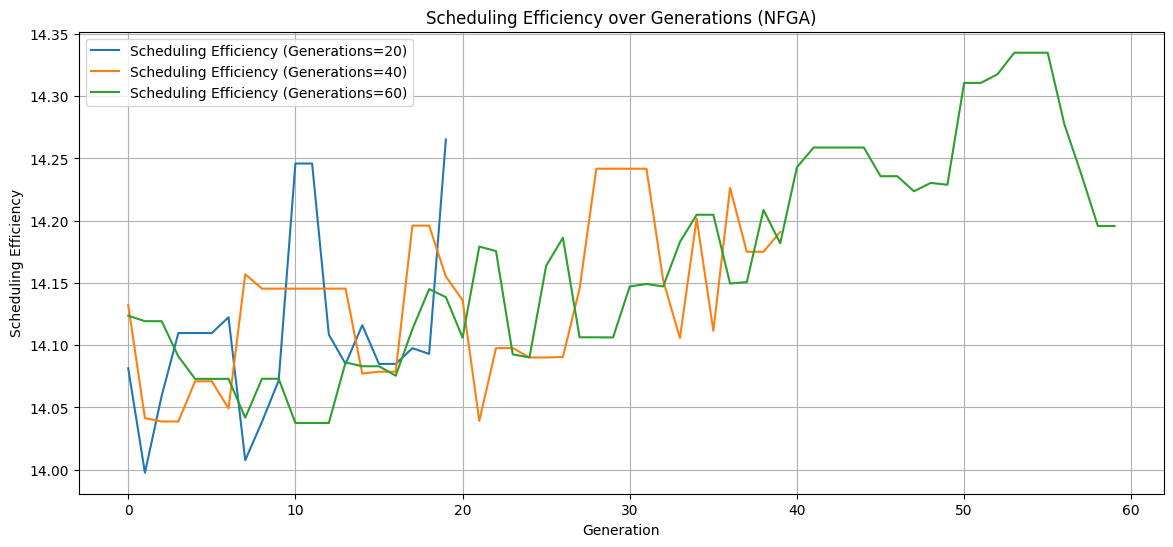

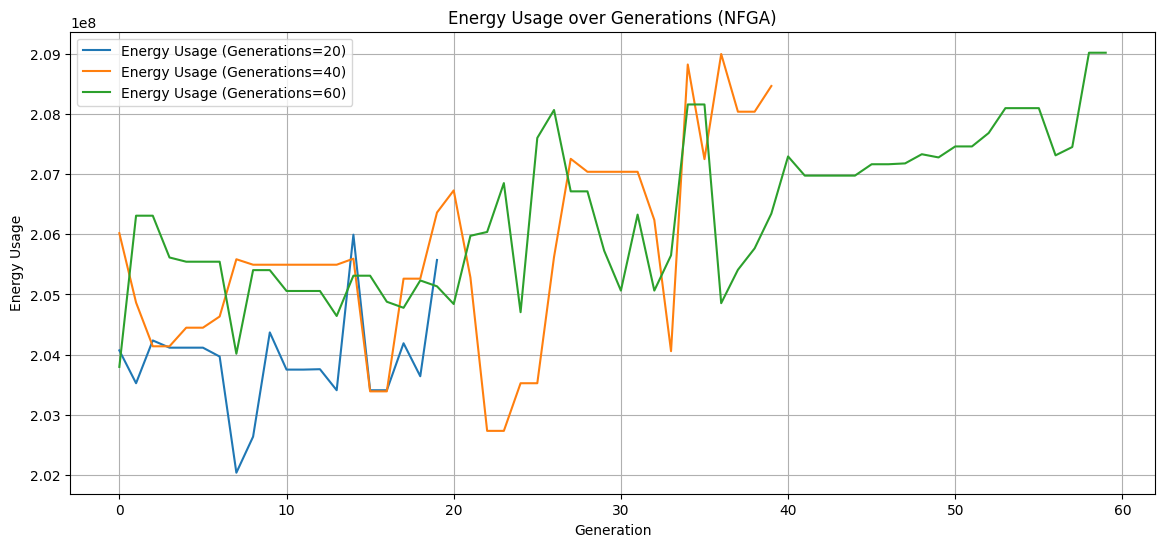

Final Results (Tabular Representation):
   Generations  Final Scheduling Efficiency  Final Energy Usage
0           20                     14.26525         205574168.0
1           40                     14.19095         208468328.0
2           60                     14.19570         209021869.0


In [ ]:
import pandas as pd
import numpy as np
import random
from deap import base, creator, tools
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("/content/Subset_final2.csv")

# Extract necessary fields
cpu_cores = data["CPU cores"]
cpu_capacity = data["CPU capacity provisioned [MHZ]"]
cpu_usage_mhz = data["CPU usage [MHZ]"]
cpu_usage_percent = data["CPU usage [%]"]
memory_capacity = data["Memory capacity provisioned [KB]"]
memory_usage = data["Memory usage [KB]"]
memory_usage_percent = data["Memory usage [%]"]

# Define GA problem
creator.create("FitnessMax", base.Fitness, weights=(1.0, -1.0))  # Maximize scheduling, minimize energy usage
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_task", random.randint, 0, len(data) - 1)  # Randomly select a task index from data
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_task, len(data) // 10)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Fitness function to evaluate resource allocation and scheduling
def fitness(individual):
    total_cpu_usage = sum(cpu_usage_mhz[i] for i in individual)
    total_memory_usage = sum(memory_usage[i] for i in individual)

    cpu_efficiency = sum(cpu_usage_percent[i] for i in individual) / len(individual)
    memory_efficiency = sum(memory_usage_percent[i] for i in individual) / len(individual)

    # Normalize energy consumption and scheduling efficiency
    energy_usage = total_cpu_usage + total_memory_usage
    scheduling_efficiency = (cpu_efficiency + memory_efficiency) / 2

    # Maximize scheduling efficiency while minimizing energy usage
    return scheduling_efficiency, -energy_usage

toolbox.register("evaluate", fitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# NFGA-specific functions
def split_into_families(population, num_families):
    """Split the population into families."""
    random.shuffle(population)
    family_size = len(population) // num_families
    return [population[i * family_size: (i + 1) * family_size] for i in range(num_families)]

def family_reproduction(family, CXPB, MUTPB):
    """Perform crossover and mutation within a family."""
    new_family = family.copy()
    for child1, child2 in zip(family[::2], family[1::2]):
        if random.random() < CXPB:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    for mutant in family:
        if random.random() < MUTPB:
            toolbox.mutate(mutant)
            del mutant.fitness.values

    invalid_ind = [ind for ind in new_family if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    return new_family

# Function to run NFGA and collect data for plotting
def run_nfga(num_generations, num_families):
    population = toolbox.population(n=50)
    CXPB, MUTPB = 0.5, 0.2  # Crossover and mutation probabilities

    best_fitness_values = []
    energy_usage_values = []

    for gen in range(num_generations):
        # Split population into families
        families = split_into_families(population, num_families)

        # Family reproduction
        new_population = []
        for family in families:
            new_family = family_reproduction(family, CXPB, MUTPB)
            new_population.extend(new_family)

        # Replace population with offspring
        population[:] = new_population

        # Collect best fitness and energy usage for plotting
        fits = [ind.fitness.values[0] for ind in population]
        best_ind = tools.selBest(population, 1)[0]
        best_fitness_values.append(max(fits))
        energy_usage_values.append(-best_ind.fitness.values[1])  # Convert to positive for plotting

    return best_fitness_values, energy_usage_values, best_ind.fitness.values

# Run NFGA for different generation counts and number of families
gen_values = [20, 40, 60]
num_families = 5  # You can change this value for experimentation
results = {gen: run_nfga(gen, num_families) for gen in gen_values}

# Create a DataFrame to store final results for tabular representation
final_results = pd.DataFrame({
    "Generations": gen_values,
    "Final Scheduling Efficiency": [results[gen][2][0] for gen in gen_values],
    "Final Energy Usage": [-results[gen][2][1] for gen in gen_values]
})

# Plot scheduling efficiency over generations
plt.figure(figsize=(14, 6))
for gen in gen_values:
    plt.plot(results[gen][0], label=f'Scheduling Efficiency (Generations={gen})')
plt.xlabel('Generation')
plt.ylabel('Scheduling Efficiency')
plt.title('Scheduling Efficiency over Generations (NFGA)')
plt.legend()
plt.grid(True)
plt.show()

# Plot energy usage over generations
plt.figure(figsize=(14, 6))
for gen in gen_values:
    plt.plot(results[gen][1], label=f'Energy Usage (Generations={gen})')
plt.xlabel('Generation')
plt.ylabel('Energy Usage')
plt.title('Energy Usage over Generations (NFGA)')
plt.legend()
plt.grid(True)
plt.show()

# Display tabular results
print("Final Results (Tabular Representation):")
print(final_results)


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


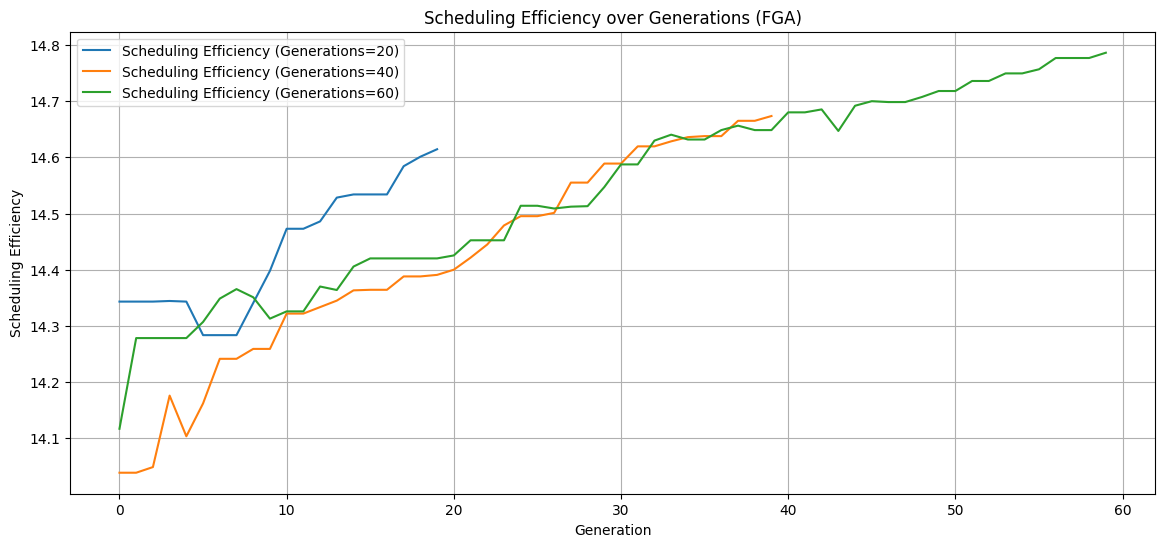

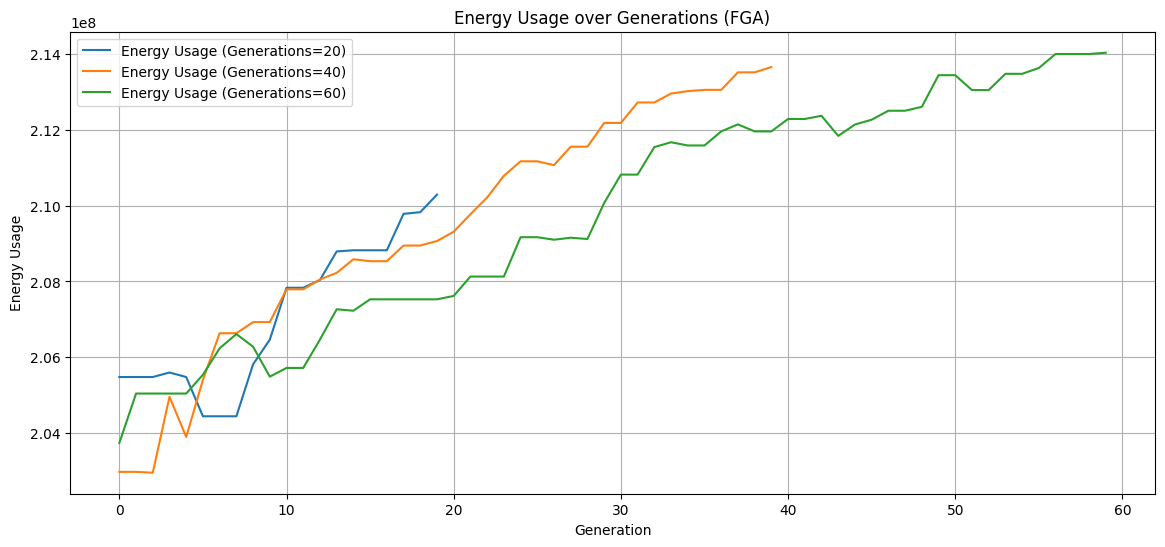

Final Results (Tabular Representation):
   Generations  Final Scheduling Efficiency  Final Energy Usage
0           20                    14.614525         210288156.0
1           40                    14.673625         213650653.0
2           60                    14.786275         214028124.0


In [ ]:
import pandas as pd
import numpy as np
import random
from deap import base, creator, tools
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("/content/Subset_final2.csv")

# Extract necessary fields
cpu_cores = data["CPU cores"]
cpu_capacity = data["CPU capacity provisioned [MHZ]"]
cpu_usage_mhz = data["CPU usage [MHZ]"]
cpu_usage_percent = data["CPU usage [%]"]
memory_capacity = data["Memory capacity provisioned [KB]"]
memory_usage = data["Memory usage [KB]"]
memory_usage_percent = data["Memory usage [%]"]

# Define GA problem
creator.create("FitnessMax", base.Fitness, weights=(1.0, -1.0))  # Maximize scheduling, minimize energy usage
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_task", random.randint, 0, len(data) - 1)  # Randomly select a task index from data
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_task, len(data) // 10)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Fitness function to evaluate resource allocation and scheduling
def fitness(individual):
    total_cpu_usage = sum(cpu_usage_mhz[i] for i in individual)
    total_memory_usage = sum(memory_usage[i] for i in individual)

    cpu_efficiency = sum(cpu_usage_percent[i] for i in individual) / len(individual)
    memory_efficiency = sum(memory_usage_percent[i] for i in individual) / len(individual)

    # Normalize energy consumption and scheduling efficiency
    energy_usage = total_cpu_usage + total_memory_usage
    scheduling_efficiency = (cpu_efficiency + memory_efficiency) / 2

    # Maximize scheduling efficiency while minimizing energy usage
    return scheduling_efficiency, -energy_usage

toolbox.register("evaluate", fitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Firefly movement
def firefly_move(ind1, ind2, attractiveness=1.0, random_factor=0.2):
    """Move firefly ind1 towards ind2 based on brightness (fitness)."""
    distance = sum((ind1[i] - ind2[i]) ** 2 for i in range(len(ind1)))
    beta = attractiveness * np.exp(-distance)  # Attractiveness decreases with distance
    movement = [(1 - beta) * ind1[i] + beta * ind2[i] + random_factor * random.uniform(-1, 1) for i in range(len(ind1))]
    return creator.Individual([int(round(x)) for x in movement])

# Function to run FGA and collect data for plotting
def run_fga(num_generations):
    population = toolbox.population(n=50)
    CXPB, MUTPB = 0.5, 0.2  # Crossover and mutation probabilities

    best_fitness_values = []
    energy_usage_values = []

    for gen in range(num_generations):
        # Firefly movement phase
        new_population = []
        for ind1 in population:
            for ind2 in population:
                if ind1.fitness.values < ind2.fitness.values:  # Move ind1 towards brighter ind2
                    ind1 = firefly_move(ind1, ind2)
                    del ind1.fitness.values  # Invalidate fitness after movement
            new_population.append(ind1)

        # Apply genetic operators
        offspring = toolbox.select(new_population, len(new_population))
        offspring = list(map(toolbox.clone, offspring))

        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        population[:] = offspring

        # Collect best fitness and energy usage for plotting
        fits = [ind.fitness.values[0] for ind in population]
        best_ind = tools.selBest(population, 1)[0]
        best_fitness_values.append(max(fits))
        energy_usage_values.append(-best_ind.fitness.values[1])  # Convert to positive for plotting

    return best_fitness_values, energy_usage_values, best_ind.fitness.values

# Run FGA for 20, 40, and 60 generations and store results
gen_values = [20, 40, 60]
results = {gen: run_fga(gen) for gen in gen_values}

# Create a DataFrame to store final results for tabular representation
final_results = pd.DataFrame({
    "Generations": gen_values,
    "Final Scheduling Efficiency": [results[gen][2][0] for gen in gen_values],
    "Final Energy Usage": [-results[gen][2][1] for gen in gen_values]
})

# Plot task scheduling efficiency over generations
plt.figure(figsize=(14, 6))
for gen in gen_values:
    plt.plot(results[gen][0], label=f'Scheduling Efficiency (Generations={gen})')
plt.xlabel('Generation')
plt.ylabel('Scheduling Efficiency')
plt.title('Scheduling Efficiency over Generations (FGA)')
plt.legend()
plt.grid(True)
plt.show()

# Plot energy usage over generations
plt.figure(figsize=(14, 6))
for gen in gen_values:
    plt.plot(results[gen][1], label=f'Energy Usage (Generations={gen})')
plt.xlabel('Generation')
plt.ylabel('Energy Usage')
plt.title('Energy Usage over Generations (FGA)')
plt.legend()
plt.grid(True)
plt.show()

# Display tabular results
print("Final Results (Tabular Representation):")
print(final_results)


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


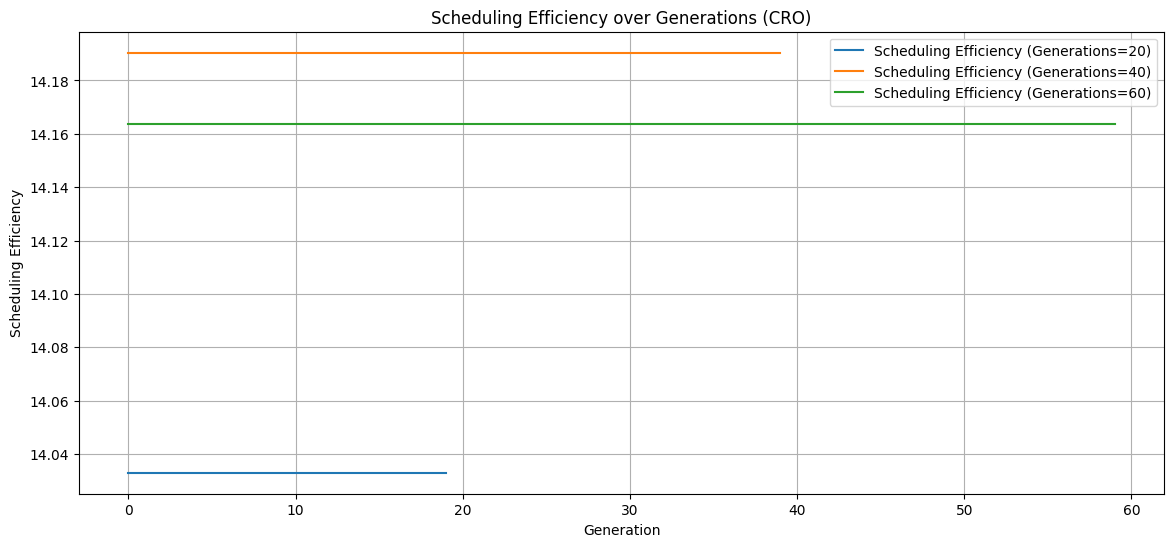

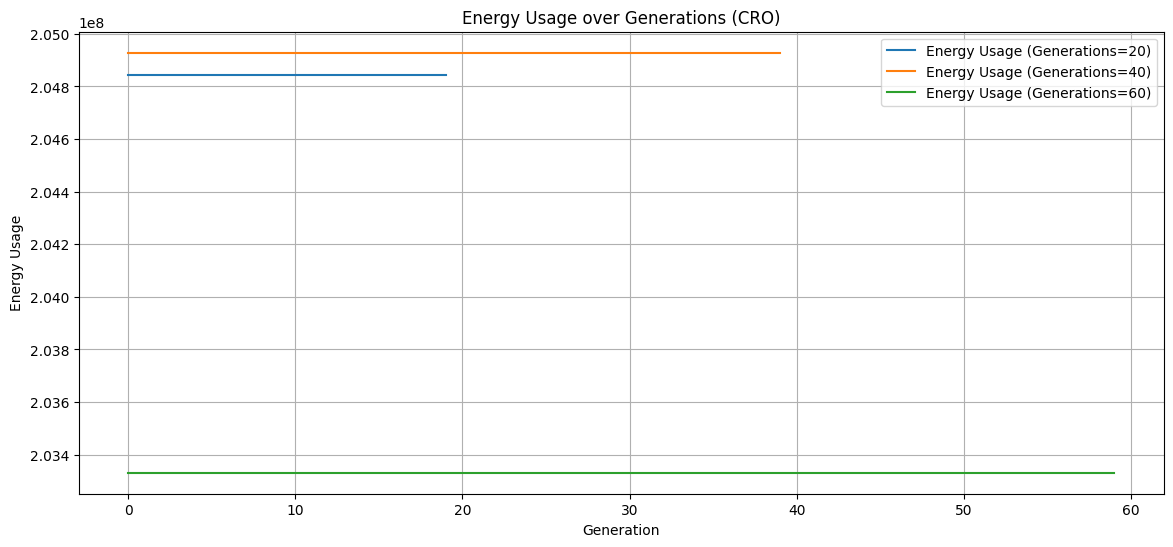

Final Results (Tabular Representation):
   Generations  Final Scheduling Efficiency  Final Energy Usage
0           20                    14.032975         204842144.0
1           40                    14.190400         204928428.0
2           60                    14.163525         203331226.0


In [ ]:
import pandas as pd
import numpy as np
import random
from deap import base, creator, tools
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("/content/Subset_final2.csv")

# Extract necessary fields
cpu_cores = data["CPU cores"]
cpu_capacity = data["CPU capacity provisioned [MHZ]"]
cpu_usage_mhz = data["CPU usage [MHZ]"]
cpu_usage_percent = data["CPU usage [%]"]
memory_capacity = data["Memory capacity provisioned [KB]"]
memory_usage = data["Memory usage [KB]"]
memory_usage_percent = data["Memory usage [%]"]

# Define GA problem
creator.create("FitnessMax", base.Fitness, weights=(1.0, -1.0))  # Maximize scheduling, minimize energy usage
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_task", random.randint, 0, len(data) - 1)  # Randomly select a task index from data
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_task, len(data) // 10)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Fitness function to evaluate resource allocation and scheduling
def fitness(individual):
    total_cpu_usage = sum(cpu_usage_mhz[i] for i in individual)
    total_memory_usage = sum(memory_usage[i] for i in individual)

    cpu_efficiency = sum(cpu_usage_percent[i] for i in individual) / len(individual)
    memory_efficiency = sum(memory_usage_percent[i] for i in individual) / len(individual)

    # Normalize energy consumption and scheduling efficiency
    energy_usage = total_cpu_usage + total_memory_usage
    scheduling_efficiency = (cpu_efficiency + memory_efficiency) / 2

    # Maximize scheduling efficiency while minimizing energy usage
    return scheduling_efficiency, -energy_usage

toolbox.register("evaluate", fitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)

# Coral Reef Optimization parameters
reef_size = (10, 10)  # Reef dimensions (rows, columns)
empty_ratio = 0.2     # Percentage of empty reef spots
larvae_prob = 0.4     # Probability of larvae settlement
depredation_rate = 0.2  # Percentage of corals removed in depredation phase

# Initialize reef with random individuals and empty spots
def initialize_reef():
    reef = np.empty(reef_size, dtype=object)
    num_corals = int((1 - empty_ratio) * reef.size)
    corals = toolbox.population(n=num_corals)
    positions = random.sample(range(reef.size), num_corals)
    for pos, coral in zip(positions, corals):
        reef.flat[pos] = coral
    return reef

# Larvae settlement
def settle_larvae(reef, larvae):
    for larva in larvae:
        if random.random() < larvae_prob:
            empty_positions = np.where(reef.flat == None)[0]
            if len(empty_positions) > 0:
                pos = random.choice(empty_positions)
                reef.flat[pos] = larva

# Depredation phase
def depredation(reef):
    # Compute fitness values, defaulting to very low fitness for empty spots
    fitnesses = [ind.fitness.values if ind and ind.fitness.valid else (-np.inf, np.inf) for ind in reef.flat]
    num_to_remove = int(depredation_rate * reef.size)

    # Identify positions with the worst fitness (lowest scheduling efficiency)
    worst_positions = np.argsort([fit[0] for fit in fitnesses])[:num_to_remove]
    for pos in worst_positions:
        reef.flat[pos] = None


# Function to run CRO and collect data for plotting
def run_cro(num_generations):
    reef = initialize_reef()
    best_fitness_values = []
    energy_usage_values = []

    for gen in range(num_generations):
        # Reproduce corals (mating and mutation)
        corals = [ind for ind in reef.flat if ind is not None]
        offspring = []
        for _ in range(len(corals) // 2):
            parent1, parent2 = random.sample(corals, 2)
            child1, child2 = toolbox.mate(parent1, parent2)
            toolbox.mutate(child1)
            toolbox.mutate(child2)
            offspring.extend([child1, child2])

        # Evaluate fitness of offspring
        for ind in offspring:
            if not ind.fitness.valid:
                ind.fitness.values = toolbox.evaluate(ind)

        # Settlement phase
        settle_larvae(reef, offspring)

        # Depredation phase
        depredation(reef)

        # Collect best fitness and energy usage for plotting
        valid_corals = [ind for ind in reef.flat if ind is not None]
        for ind in valid_corals:
            if not ind.fitness.valid:  # Ensure fitness is computed
                ind.fitness.values = toolbox.evaluate(ind)

        fits = [ind.fitness.values[0] for ind in valid_corals]
        if fits:  # Ensure there are valid fitness values
            best_ind = max(valid_corals, key=lambda ind: ind.fitness.values[0])
            best_fitness_values.append(best_ind.fitness.values[0])
            energy_usage_values.append(-best_ind.fitness.values[1])  # Convert to positive for plotting

    return best_fitness_values, energy_usage_values, best_ind.fitness.values


# Run CRO for 20, 40, and 60 generations and store results
gen_values = [20, 40, 60]
results = {gen: run_cro(gen) for gen in gen_values}

# Create a DataFrame to store final results for tabular representation
final_results = pd.DataFrame({
    "Generations": gen_values,
    "Final Scheduling Efficiency": [results[gen][2][0] for gen in gen_values],
    "Final Energy Usage": [-results[gen][2][1] for gen in gen_values]
})

# Plot task scheduling efficiency over generations
plt.figure(figsize=(14, 6))
for gen in gen_values:
    plt.plot(results[gen][0], label=f'Scheduling Efficiency (Generations={gen})')
plt.xlabel('Generation')
plt.ylabel('Scheduling Efficiency')
plt.title('Scheduling Efficiency over Generations (CRO)')
plt.legend()
plt.grid(True)
plt.show()

# Plot energy usage over generations
plt.figure(figsize=(14, 6))
for gen in gen_values:
    plt.plot(results[gen][1], label=f'Energy Usage (Generations={gen})')
plt.xlabel('Generation')
plt.ylabel('Energy Usage')
plt.title('Energy Usage over Generations (CRO)')
plt.legend()
plt.grid(True)
plt.show()

# Display tabular results
print("Final Results (Tabular Representation):")
print(final_results)


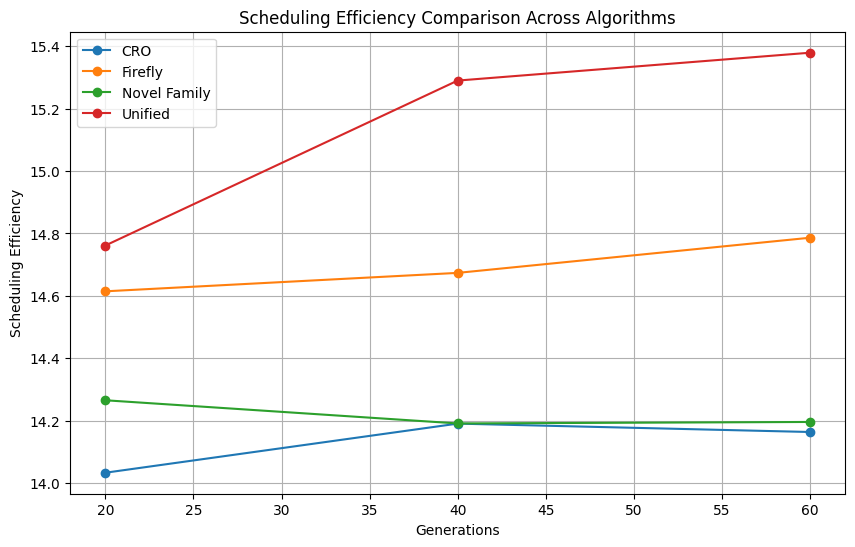

In [ ]:
import matplotlib.pyplot as plt

# Data from the algorithms
generations = [20, 40, 60]

# Scheduling efficiency values from your algorithms
cro_scheduling_efficiency = [14.032975, 14.190400, 14.163525]
firefly_scheduling_efficiency = [14.614525, 14.673625, 14.786275]
novel_family_scheduling_efficiency = [14.26525, 14.19095, 14.19570]
unified_scheduling_efficiency = [14.761400, 15.290125, 15.379425]

# Plotting the comparison graph
plt.figure(figsize=(10, 6))

plt.plot(generations, cro_scheduling_efficiency, label="CRO", marker='o')
plt.plot(generations, firefly_scheduling_efficiency, label="Firefly", marker='o')
plt.plot(generations, novel_family_scheduling_efficiency, label="Novel Family", marker='o')
plt.plot(generations, unified_scheduling_efficiency, label="Unified", marker='o')

# Adding labels and title
plt.xlabel('Generations')
plt.ylabel('Scheduling Efficiency')
plt.title('Scheduling Efficiency Comparison Across Algorithms')
plt.legend()
plt.grid(True)
plt.show()
